In [7]:
import pyarabic.araby as araby
import pyarabic.number as number
from pyarabic.number import vocalize_number

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize


import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt

In [8]:
hadith_with_tashkel = pd.read_csv('Sahih Bukhari.csv')
hadith_with_tashkel.head()

,Sahih Bukhari
0,حَدَّثَنَا الْحُمَيْدِيُّ عَبْدُ اللَّهِ بْنُ ...
1,حَدَّثَنَا عَبْدُ اللَّهِ بْنُ يُوسُفَ قَالَ أ...
2,حَدَّثَنَا يَحْيَى بْنُ بُكَيْرٍ قَالَ حَدَّثَ...
3,حَدَّثَنَا مُوسَى بْنُ إِسْمَاعِيلَ قَالَ حَدّ...
4,حَدَّثَنَا عَبْدَانُ قَالَ أَخْبَرَنَا عَبْدُ ...


In [10]:
"""
* Make all Hadith in a list "all_hadiths"  
* tokenize each sentence to get a list of tokenizations "list_of_all_words" 
* make a list of words from all tokenizations
"""

all_hadiths = hadith_with_tashkel['Sahih Bukhari']
list_of_all_words = []

for hadith in all_hadiths:
    list_of_tokenizes = araby.tokenize(hadith)
    for word in list_of_tokenizes:
        if word not in string.punctuation:
            list_of_all_words.append(word)
                
len(list_of_all_words) # 519471 word in Sahih Bukhari

519471

In [22]:
"""
* make a word frequent and sorted them as a top 5000 descending order 
"""
word_freq = FreqDist(list_of_all_words)
sorted_freq_dist = sorted(word_freq, key= word_freq.__getitem__ , reverse= True)
sorted_freq_dist = sorted_freq_dist[:5000]
sorted_freq_dist
# should make a stemming for each word?

['عَنْ',
 'اللَّهُ',
 'قَالَ',
 'حَدَّثَنَا',
 'اللَّهِ',
 'عَلَيْهِ',
 'صَلَّى',
 'وَسَلَّمَ',
 'بْنُ',
 'مِنْ',
 'بْنِ',
 'أَبِي',
 'فِي',
 'فَقَالَ',
 'رَضِيَ',
 'ثُمَّ',
 'عَلَى',
 'مَا',
 'عَبْدِ',
 'أَبُو',
 'لَا',
 'أَنَّ',
 'أَنْ',
 'عَبْدُ',
 'رَسُولَ',
 'إِلَى',
 'رَسُولُ',
 'عَنْهُ',
 'النَّبِيُّ',
 'حَتَّى',
 'يَا',
 'حَدَّثَنِي',
 'النَّبِيِّ',
 'كَانَ',
 'ابْنِ',
 'أَخْبَرَنَا',
 'لَهُ',
 'بْنَ',
 'إِلَّا',
 'ابْنُ',
 'أَوْ',
 'سَمِعْتُ',
 'عُمَرَ',
 'وَلَا',
 'قَالَتْ',
 'يَقُولُ',
 'مَنْ',
 'عَنْهُمَا',
 'هُرَيْرَةَ',
 'النَّبِيَّ',
 'مُحَمَّدُ',
 'هَذَا',
 'يَحْيَى',
 'وَقَالَ',
 'إِنَّ',
 'ذَلِكَ',
 'إِذَا',
 'أَنَّهُ',
 'مُوسَى',
 'عَائِشَةَ',
 'الرَّحْمَنِ',
 'عَبَّاسٍ',
 'رَسُولِ',
 'بِهِ',
 'لَمْ',
 'أَبَا',
 'أَبِيهِ',
 'فَلَمَّا',
 'قَدْ',
 'أَخْبَرَنِي',
 'بَكْرٍ',
 'لِي',
 'قُلْتُ',
 'سَعِيدٍ',
 'سُفْيَانُ',
 'وَهُوَ',
 'شُعْبَةُ',
 'شِهَابٍ',
 'مَالِكٍ',
 'وَكَانَ',
 'عَنْهَا',
 'فَقُلْتُ',
 'الَّذِي',
 'مَعَ',
 'يَوْمَ',
 'رَجُلٌ',
 'اللَّهَ',
 'الزُّهْرِيِّ

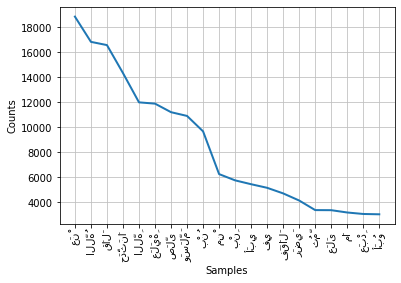

In [12]:
"""
* top 20 word most frequent
"""
word_freq.plot(20)

In [19]:
"""
* make a list of frequent numbers and showing each word and number of occurrences 
* make a Pandas Data Frame 

"""
num_of_freq = []
for word in sorted_freq_dist:
    num_of_freq.append(word_freq[word])

    
df_top_5000_sahihBukhari_Words = pd.DataFrame({'Hadith_Words': sorted_freq_dist, 'Number_of_occurrences': num_of_freq})
df_top_5000_sahihBukhari_Words.head()

,Hadith_Words,Number_of_occurrences
0,عَنْ,18853
1,اللَّهُ,16832
2,قَالَ,16573
3,حَدَّثَنَا,14333
4,اللَّهِ,11988


In [15]:
df_top_5000_sahihBukhari_Words.shape

(5000, 2)

In [21]:
"""
* saving it as an Excel and CSV files
"""
df_top_5000_sahihBukhari_Words.to_csv('mostFrequent_5000_sahihBukhari_Words.csv')
df_top_5000_sahihBukhari_Words.to_excel('mostFrequent_5000_sahihBukhari_Words.xlsx')

In [16]:
"""
* make an word cloud image "image contain most frequent words without tashkeel 
"""
arabic_10 = sorted_freq_dist[:200] # 200 word
list_for_wordcloud = " ".join(araby.strip_tashkeel(word) for word in arabic_10 ) 
print(list_for_wordcloud)

عن الله قال حدثنا الله عليه صلى وسلم بن من بن أبي في فقال رضي ثم على ما عبد أبو لا أن أن عبد رسول إلى رسول عنه النبي حتى يا حدثني النبي كان ابن أخبرنا له بن إلا ابن أو سمعت عمر ولا قالت يقول من عنهما هريرة النبي محمد هذا يحيى وقال إن ذلك إذا أنه موسى عائشة الرحمن عباس رسول به لم أبا أبيه فلما قد أخبرني بكر لي قلت سعيد سفيان وهو شعبة شهاب مالك وكان عنها فقلت الذي مع يوم رجل الله الزهري فإذا فيه هو إبراهيم سلمة عمر سمع محمد يوسف بين إن أنا بها مالك وما والله ابن منه إني إليه نعم فيها عند اللهم فلم قالوا حين شيئا إبراهيم الناس الليث فلا عروة أنس لك هذه إسماعيل نافع ولم الناس إسماعيل عبد مسدد رجلا علي علي كنت بني جاء بعد لهم فقالت لها أهل هل رأيت عبيد كما قتادة وقد كنا لو قتيبة معه وإن ومن فما إسحاق سعد عمرو زيد قبل عبيد منها كانت سعيد وأنا سليمان فإن إسحاق لنا الزبير لما شعيب أنس ليس يزيد فقالوا اليمان العزيز قام دخل لقد ألا أخبره وإذا سليمان عائشة التي عمرو بيده النار عليها محمد سعيد فإن خرج خالد أسامة إنما الذين شيء


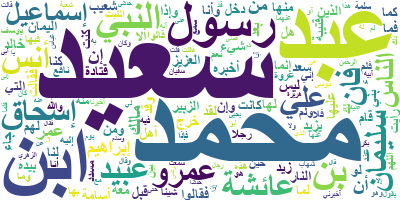

In [20]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
from wordcloud import WordCloud

text = list_for_wordcloud 
reshaped_text = arabic_reshaper.reshape(text)
artext = get_display(reshaped_text)


# wordcloud = WordCloud().generate(artext)
wordcloud = WordCloud(background_color="white", font_path="arial-bold.ttf").generate(artext) #  arial-bold.ttf is a font 

wordcloud.to_image()
